<a href="https://colab.research.google.com/github/chripark123/Unit2Project/blob/main/LGA_Python_Project_3_NYPD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [14]:
df=pd.read_csv('gdrive/My Drive/NYPD_Arrest_Data__Year_to_Date__20250414.csv')
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,281369711,01/30/2024,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306501,F,M,25,0,25-44,M,BLACK,1000558,231080,40.800930,-73.941098,POINT (-73.9410982410066 40.8009303727402)
1,284561406,03/30/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,44,0,25-44,M,BLACK,1004297,242846,40.833209,-73.927554,POINT (-73.927554 40.833209)
2,284896016,04/06/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,19,0,25-44,M,BLACK,997304,222853,40.778348,-73.952863,POINT (-73.952863 40.778348)
3,285569016,04/18/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,69,0,25-44,M,BLACK,1010576,175628,40.648698,-73.905128,POINT (-73.905128 40.648698)
4,287308954,05/22/2024,464.0,JOSTLING,230.0,JOSTLING,PL 1652501,M,M,18,0,18-24,M,WHITE,991530,217373,40.763313,-73.973717,POINT (-73.973717 40.763313)


In [16]:
#1 Clean Data

#Drop rows with missing or unknown race
df = df[df['PERP_RACE'].notna() & (df['PERP_RACE'] != 'UNKNOWN')]

In [17]:
#2 Choose a zip/city:

#Focus on only Brooklyn (K) and Manhattan (M)
df = df[(df['ARREST_BORO'] == 'K') | (df['ARREST_BORO'] == 'M')]

In [18]:
#3 Pick one column to analyze

#Total Arrests by Race in Each Borough
race_counts = df.groupby(['ARREST_BORO', 'PERP_RACE']).size().unstack(fill_value=0)
print(race_counts)

PERP_RACE    AMERICAN INDIAN/ALASKAN NATIVE  ASIAN / PACIFIC ISLANDER  BLACK  \
ARREST_BORO                                                                    
K                                       175                      3626  40952   
M                                       193                      2373  29580   

PERP_RACE    BLACK HISPANIC  WHITE  WHITE HISPANIC  
ARREST_BORO                                         
K                      4138   8869           14372  
M                      7063   7259           15240  


In [19]:
#4 Statistics

# Most arrested in each borough:

print("Most Arrested Race in Brooklyn:", race_counts.loc['K'].idxmax())
print("Most Arrested Race in Manhattan:", race_counts.loc['M'].idxmax())

Most Arrested Race in Brooklyn: BLACK
Most Arrested Race in Manhattan: BLACK


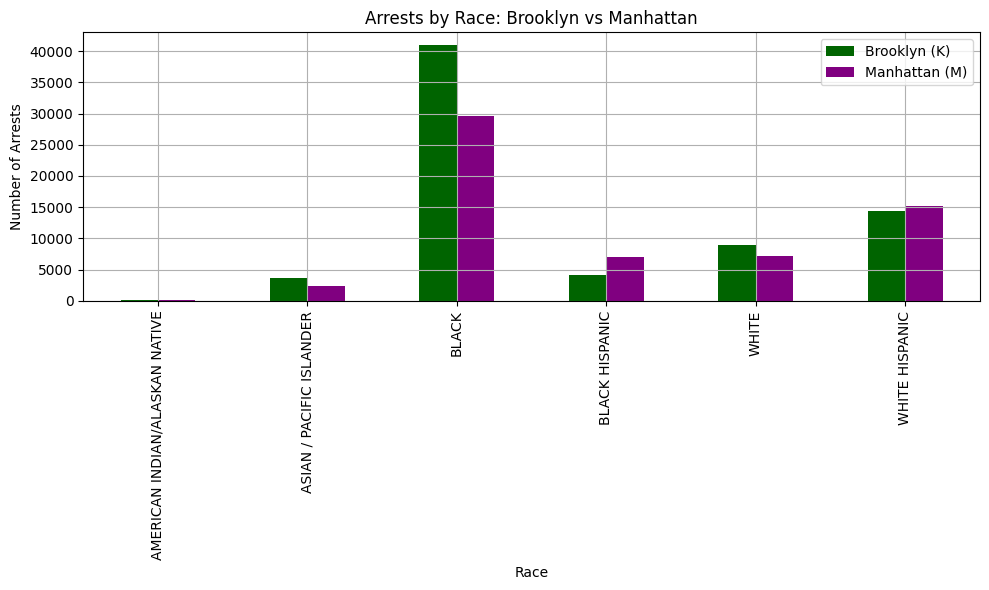

In [20]:
#Visualization

race_counts.T[['K', 'M']].plot(kind='bar', figsize=(10,6), color=['darkgreen', 'purple'])

plt.title('Arrests by Race: Brooklyn vs Manhattan')
plt.xlabel('Race')
plt.ylabel('Number of Arrests')
plt.legend(['Brooklyn (K)', 'Manhattan (M)'])
plt.grid(True)
plt.tight_layout()
plt.show()

#Conclusion

In both Brooklyn and Manhattan, Black and Hispanic demographic are the races with the most arrests. Reasons for this could be related to difference in policing, crime reporting, or community demographics -- but it raises questions of possible racial profiling and bias.
